<a href="https://colab.research.google.com/github/muhammadfariedkhaizun-gif/flask-python-Spam-Detector-For-SMS-Messages/blob/main/MNIST_on_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [ ]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
!nvidia-smi

Thu Jan 30 14:25:35 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Code below is inspired and comes from:

**[Machine Learning Mastery by Jason Brownlee](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


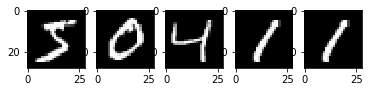

In [ ]:
plt.subplot(151)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(152)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(153)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(154)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(155)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

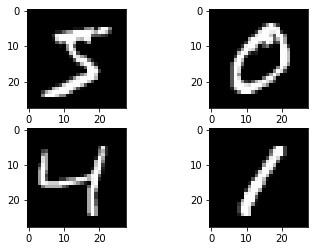

In [ ]:
# Plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
X_train.shape

(60000, 28, 28)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.utils import np_utils

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

model = Sequential()

# model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

NameError: ignored

Using CPU, it takes ~6 seconds per epoch, using GPU, it takes ~2 seconds per epoch on this simple neural network exercise.

In [ ]:
# Save whole model for download
model.save("model.h5")

In [3]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 112kB 12.3MB/s 
  Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0


In [ ]:
!tensorflowjs_converter --input_format keras '/content/model.h5' '/content/model'